In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

In [9]:
csv_path ='data/MWRA-LAB-RESULTS-2024.csv'
df = pd.read_csv(csv_path)

In [10]:
df

,STUDY_ID,EVENT_ID,STAT_ID,STAT_ARRIV,DEPTH,ORDERED_DEPTH_CODE,NH4,NO2,NO3,NO3_NO2,...,TN,PON,PO4,TDP,PARTP,TPHOS,SIO4,POC,CHLA,PHAE
0,BWQM,WN241,F23,08-FEB-2024 08:04:11,1.76,A,1.8500,0.146,9.654,NaN,...,NaN,1.94,0.976,1.400,0.1580,NaN,12.000,15.70,0.677,0.369
1,BWQM,WN241,F23,08-FEB-2024 08:04:11,8.11,B,1.8800,0.144,9.786,NaN,...,NaN,1.94,0.979,0.858,0.1590,NaN,12.000,14.60,NaN,NaN
2,BWQM,WN241,F23,08-FEB-2024 08:04:11,13.73,C,1.7100,0.142,9.693,NaN,...,NaN,2.12,0.952,1.155,0.1445,NaN,11.800,18.15,0.612,0.443
3,BWQM,WN241,F23,08-FEB-2024 08:04:11,21.49,D,1.7600,0.135,9.425,NaN,...,NaN,2.69,1.000,1.210,0.2030,NaN,11.600,23.50,NaN,NaN
4,BWQM,WN241,F23,08-FEB-2024 08:04:11,27.23,E,1.6500,0.121,9.479,NaN,...,NaN,2.22,0.933,1.060,0.2500,NaN,11.500,19.00,0.667,0.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,PCCS,WN249_PCCS,F01,22-OCT-2024 06:12:00,23.50,E,1.1123,NaN,NaN,0.510,...,11.10,NaN,0.568,NaN,NaN,0.976,3.035,NaN,2.220,0.400
545,PCCS,WN249_PCCS,F29,22-OCT-2024 07:40:00,1.50,A,0.1946,NaN,NaN,1.425,...,10.80,NaN,0.432,NaN,NaN,0.846,2.285,NaN,3.710,0.760
546,PCCS,WN249_PCCS,F29,22-OCT-2024 07:40:00,60.50,E,0.3032,NaN,NaN,8.100,...,14.40,NaN,1.003,NaN,NaN,1.400,11.462,NaN,0.410,0.430
547,PCCS,WN249_PCCS,F02,22-OCT-2024 09:24:00,1.50,A,0.4415,NaN,NaN,0.841,...,8.78,NaN,0.486,NaN,NaN,0.818,1.533,NaN,1.990,0.270


In [41]:
(df.loc[df['STAT_ID'] == 'F23']).loc[df["STAT_ARRIV"] == "08-FEB-2024 08:04:11"]

,STUDY_ID,EVENT_ID,STAT_ID,STAT_ARRIV,DEPTH,ORDERED_DEPTH_CODE,NH4,NO2,NO3,NO3_NO2,...,TN,PON,PO4,TDP,PARTP,TPHOS,SIO4,POC,CHLA,PHAE
0,BWQM,WN241,F23,08-FEB-2024 08:04:11,1.76,A,1.85,0.146,9.654,NaN,...,NaN,1.94,0.976,1.400,0.1580,NaN,12.0,15.70,0.677,0.369
1,BWQM,WN241,F23,08-FEB-2024 08:04:11,8.11,B,1.88,0.144,9.786,NaN,...,NaN,1.94,0.979,0.858,0.1590,NaN,12.0,14.60,NaN,NaN
2,BWQM,WN241,F23,08-FEB-2024 08:04:11,13.73,C,1.71,0.142,9.693,NaN,...,NaN,2.12,0.952,1.155,0.1445,NaN,11.8,18.15,0.612,0.443
3,BWQM,WN241,F23,08-FEB-2024 08:04:11,21.49,D,1.76,0.135,9.425,NaN,...,NaN,2.69,1.000,1.210,0.2030,NaN,11.6,23.50,NaN,NaN
4,BWQM,WN241,F23,08-FEB-2024 08:04:11,27.23,E,1.65,0.121,9.479,NaN,...,NaN,2.22,0.933,1.060,0.2500,NaN,11.5,19.00,0.667,0.565


In [3]:
def create_station_legend_handles(station_ids, color_map):
    """
    Returns a list of handles (Line2D) for each station in station_ids.
    """
    station_handles = []
    for s in station_ids:
        handle = Line2D(
            [0], [0],
            marker='o',
            color='w',
            markerfacecolor=color_map[s],
            markersize=8,
            label=f"Station {s}"
        )
        station_handles.append(handle)
    return station_handles

In [34]:
def plot_daily_profiles_grid(csv_path, x_param, y_param, n_cols=3, x_label=None, y_label=None):
    """
    Create a grid of subplots (one per day) showing daily profiles for a given x, y parameter pair.
    
    Parameters:
        csv_path  : Path to the CSV file.
        x_param   : Column name for the x-axis.
        y_param   : Column name for the y-axis.
        n_cols    : Number of columns in the subplot grid.
        fig_title : Overall title for the figure (default: "Daily Profiles Grid: {y_param} vs. {x_param}").
        x_label   : Common x-axis label for the entire figure (default: x_param).
        y_label   : Common y-axis label for the entire figure (default: y_param).
    """
    fig_title = f"Daily Profiles Grid: {y_param} vs. {x_param}"
    if x_label is None:
        x_label = x_param
    if y_label is None:
        y_label = y_param

    df = pd.read_csv(csv_path)
    df['STAT_ARRIV'] = pd.to_datetime(df['STAT_ARRIV'], errors='coerce')
    
    req_cols = ['STAT_ARRIV', x_param, y_param, 'STAT_ID']
    df_filtered = df.dropna(subset=req_cols)
    df_filtered['sample_date'] = df_filtered['STAT_ARRIV'].dt.date
    
    unique_dates = sorted(df_filtered['sample_date'].unique())
    
    station_ids = df_filtered['STAT_ID'].unique()
    station_colors = plt.cm.tab10.colors
    color_map = {station: station_colors[i % len(station_colors)]
                 for i, station in enumerate(station_ids)}
    
    n_days = len(unique_dates)
    n_rows = int(np.ceil(n_days / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), squeeze=False)
    axes = axes.flatten()
    
    for i, date in enumerate(unique_dates):
        ax = axes[i]
        day_data = df_filtered[df_filtered['sample_date'] == date]
        
        for station, group in day_data.groupby('STAT_ID'):
            station_color = color_map[station]
            ax.scatter(
                group[x_param],
                group[y_param],
                color=station_color,
                alpha=0.7,
                edgecolor='k',
                linewidth=0.5
            )
            ax.plot(
                group[x_param],
                group[y_param],
                '-',
                color=station_color,
                alpha=0.5,
                linewidth=1
            )

        try:
            formatted_date = datetime.combine(date, datetime.min.time()).strftime("%d %b %Y")
        except Exception:
            formatted_date = str(date)
        ax.set_title(formatted_date, fontsize=10)
        ax.grid(True, alpha=0.3)
    
    for j in range(n_days, len(axes)):
        fig.delaxes(axes[j])
    
    station_handles = create_station_legend_handles(station_ids, color_map)
    fig.legend(handles=station_handles, loc='upper right', title="Station ID")
        
    fig.suptitle(fig_title, fontsize=24)
    fig.supxlabel(x_label, fontsize=16)
    fig.supylabel(y_label, fontsize=16)
    
    output_filename = f"daily_profiles_grid_{y_param}_vs_{x_param}.png"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved combined daily profiles grid to {output_filename}")


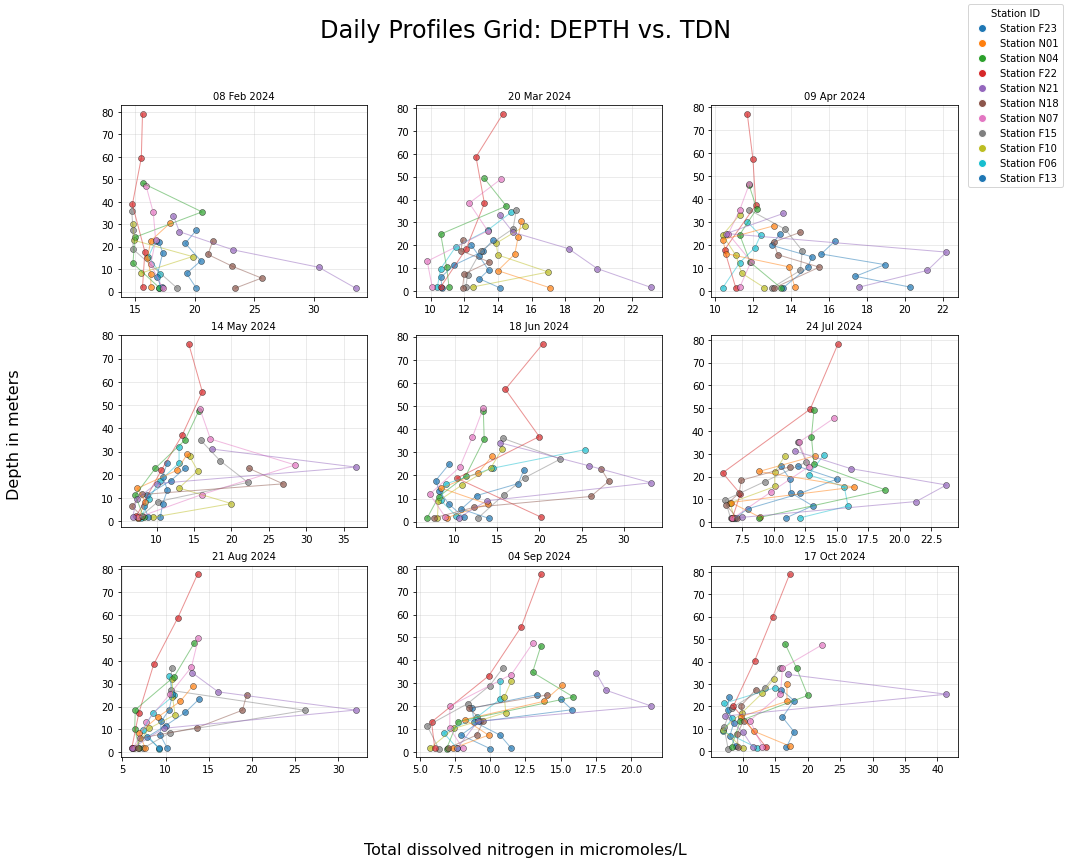

Saved combined daily profiles grid to daily_profiles_grid_DEPTH_vs_TDN.png


In [37]:
plot_daily_profiles_grid(
    csv_path, x_param='TDN', y_param='DEPTH', 
    x_label='Total dissolved nitrogen in micromoles/L',
    y_label='Depth in meters')

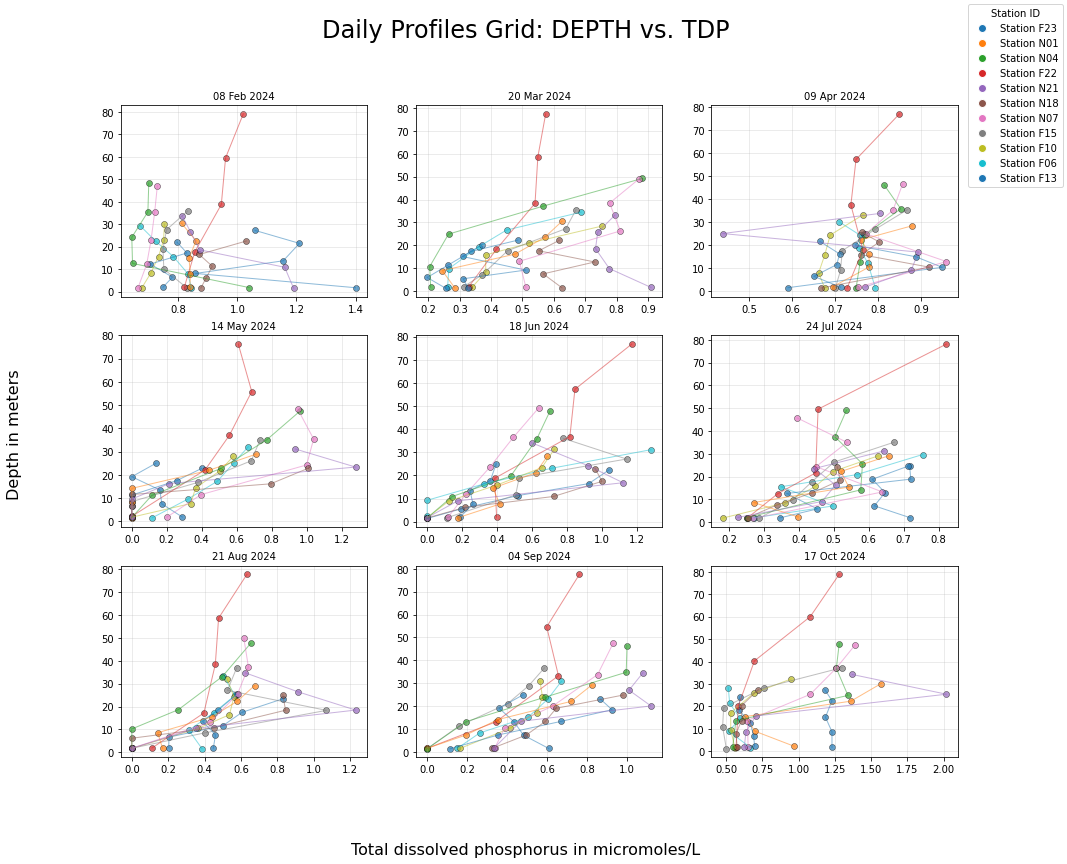

Saved combined daily profiles grid to daily_profiles_grid_DEPTH_vs_TDP.png


In [39]:
plot_daily_profiles_grid(
    csv_path, x_param='TDP', y_param='DEPTH', 
    x_label='Total dissolved phosphorus in micromoles/L',
    y_label='Depth in meters')